In [1]:
from src.data_loaders import load_fb_close_stock_price
from src.visualization import viz_time_series, viz_multiple_time_series
from src.data_analysis import compute_moving_mean, compute_moving_std, adf_test
from src.fit_classical_methods import auto_arima, arima
import matplotlib.pyplot as plt

In [2]:
data = load_fb_close_stock_price()
column_name = "Close"
ylabel = "Close Stock Price"
title="META Close Stock Price"
xlabel="Date"

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


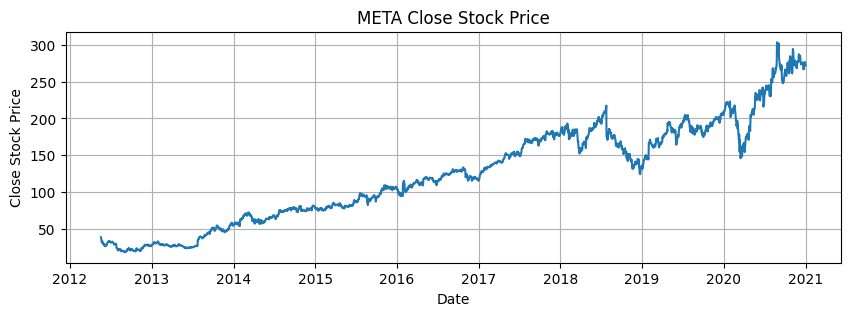

In [4]:
viz_time_series(data=data, title=title, xlabel=xlabel, ylabel=ylabel)

/var/folders/mc/mrbd15390jvc_j1v6g876vr40000gn/T/ipykernel_3150/994721344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "rolling_avg"] = compute_moving_mean(data=data, column_name=column_name, window=365)
/var/folders/mc/mrbd15390jvc_j1v6g876vr40000gn/T/ipykernel_3150/994721344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "rolling_std"] = compute_moving_std(data=data, column_name=column_name, window=365)


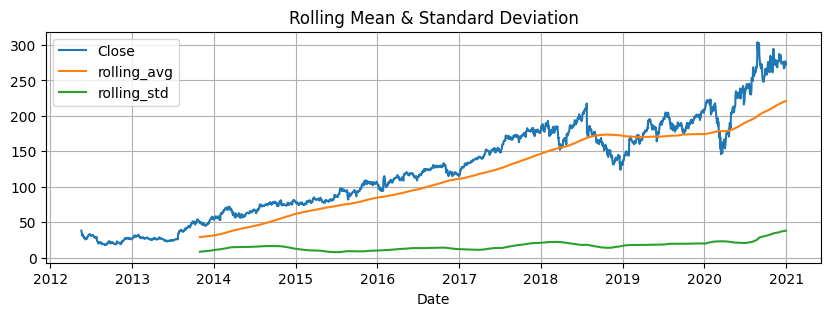

In [5]:
#Determine rolling statistics
data.loc[:, "rolling_avg"] = compute_moving_mean(data=data, column_name=column_name, window=365)
data.loc[:, "rolling_std"] = compute_moving_std(data=data, column_name=column_name, window=365)

viz_multiple_time_series(data,
                         columns=[column_name, "rolling_avg", "rolling_std"],
                         title='Rolling Mean & Standard Deviation',
                         xlabel='Date')

In [6]:
adf_test(data, column_name)

Test Statistic                    0.030056
p-value                           0.960948
#Lags Used                       26.000000
Number of Observations Used    2143.000000
Critical Value (1%)              -3.433405
Critical Value (5%)              -2.862890
Critical Value (10%)             -2.567488
dtype: float64

In [7]:
auto_arima(data, column_name)


ARIMA(order=(3, 1, 0), scoring_args={}, suppress_warnings=True)

In [8]:
data

,Close,rolling_avg,rolling_std
Date,,,
2012-05-18,38.230000,NaN,NaN
2012-05-21,34.029999,NaN,NaN
2012-05-22,31.000000,NaN,NaN
2012-05-23,32.000000,NaN,NaN
2012-05-24,33.029999,NaN,NaN
...,...,...,...
2020-12-24,267.399994,220.297397,37.845178
2020-12-28,277.000000,220.506219,37.947334
2020-12-29,276.779999,220.721069,38.043479


In [9]:
result = arima(data, column_name, (5, 2, 3))
result.forecast()

/Users/chiara/Library/Caches/pypoetry/virtualenvs/time-series-mix-1W2idDVy-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chiara/Library/Caches/pypoetry/virtualenvs/time-series-mix-1W2idDVy-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chiara/Library/Caches/pypoetry/virtualenvs/time-series-mix-1W2idDVy-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chiara/Library/Caches/pypoetry

2170    273.293614
dtype: float64

In [10]:
result = arima(data, column_name, (3, 1, 0))
result.forecast()

/Users/chiara/Library/Caches/pypoetry/virtualenvs/time-series-mix-1W2idDVy-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chiara/Library/Caches/pypoetry/virtualenvs/time-series-mix-1W2idDVy-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chiara/Library/Caches/pypoetry/virtualenvs/time-series-mix-1W2idDVy-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chiara/Library/Caches/pypoetry

2170    273.036491
dtype: float64